# Day 10: Using Decision Trees for Classification

**Step 1: Import Libraries**

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()


Saving day8_students_data.csv to day8_students_data.csv


**Step 2: Load the Data**

In [5]:
df = pd.read_csv("day8_students_data.csv")
print(df)
# Convert Yes/No to 1/0
df['Passed'] = df['Passed'].map({'Yes': 1, 'No': 0})
df = df.dropna(subset=['Passed'])  # Remove missing values
print(df)

        Name  Age  Marks Passed
0  Mritunjay   19     85    Yes
1      Priya   21     45     No
2      Rahul   20     78    Yes
3      Aditi   22     50     No
4     Vikram   23     90    Yes
5       Sita   20     33     No
6       Aman   21     60    Yes
7       Neha   19     88    Yes
8      Karan   22     70    Yes
9      Pooja   20     40     No
        Name  Age  Marks  Passed
0  Mritunjay   19     85       1
1      Priya   21     45       0
2      Rahul   20     78       1
3      Aditi   22     50       0
4     Vikram   23     90       1
5       Sita   20     33       0
6       Aman   21     60       1
7       Neha   19     88       1
8      Karan   22     70       1
9      Pooja   20     40       0


**Step 3: Prepare Data**

In [6]:
X = df[['Age', 'Marks']]
y = df['Passed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # here test size is 20%
#that why at step 6 when we ploy tree it shows tree based upon 80% of the data

**Step 4: Train the Decision Tree**

In [7]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**Step 5: Predictions & Accuracy**

In [8]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



**Step 6: Visualize the Tree**

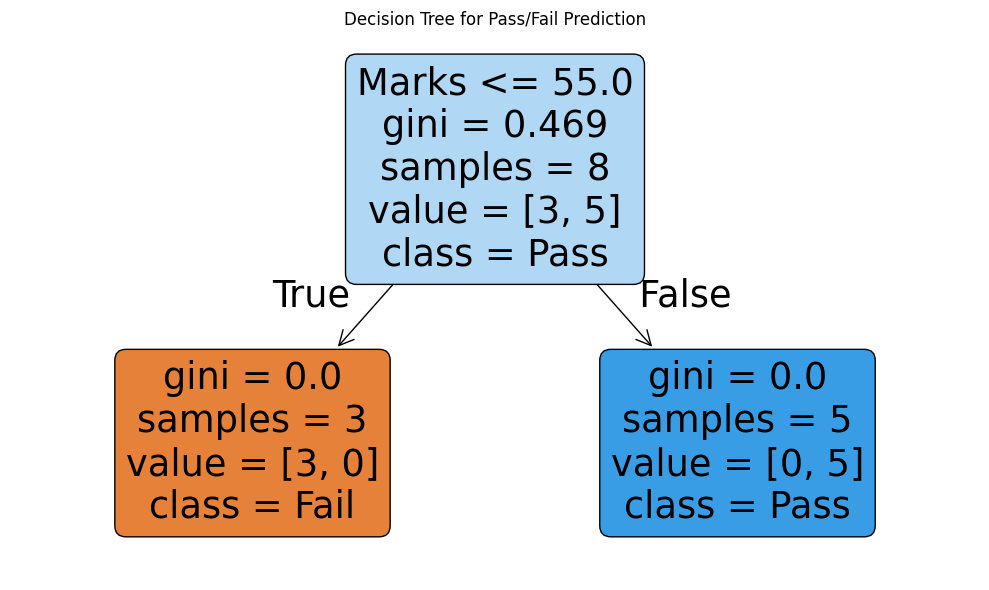

In [12]:
plt.figure(figsize=(10,6))
plot_tree(
    model,
    feature_names=['Age', 'Marks'],
    class_names=['Fail', 'Pass'],
    filled=True,
    rounded=True
)
plt.title("Decision Tree for Pass/Fail Prediction")
plt.tight_layout()  # Adjust layout to prevent label cut-off
plt.show()